In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv(r'D:\DA_Portfolio\Global Condom Sales and Awareness (2015-2025)\Dataset\Rich_Global_Condom_Usage_Dataset.csv')
df['Year'] = pd.to_datetime(df['Year'], errors='coerce', format='%Y')  
df['Year'] = df['Year'].dt.year


df[['Male Purchases (%)', 'Female Purchases (%)']] = df['Male vs Female Purchases (%)'].str.extract(r'(\d+)% Male - (\d+)% Female')
df = df.drop(columns='Male vs Female Purchases (%)')

df.rename(columns={'Teen Pregnancy Rate (per 1000 teens)': 'Teen Pregnancy Rate (per 10000 teens)'}, inplace=True)

df['Male Purchases (%)'] = pd.to_numeric(df['Male Purchases (%)'], errors='coerce')
df['Female Purchases (%)'] = pd.to_numeric(df['Female Purchases (%)'], errors='coerce')

custom_palette = ['#E63946','#A8DADC', '#457B9D', '#1D3557','#F1FAEE']
custom_palette2 = ['#E63946','#A8DADC']

C:\Users\aungh\AppData\Local\Temp\ipykernel_21088\285160970.py:5: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  sns.barplot(data=df_condom_type, x='Most Popular Condom Type', y='count', hue='count', palette=custom_palette)


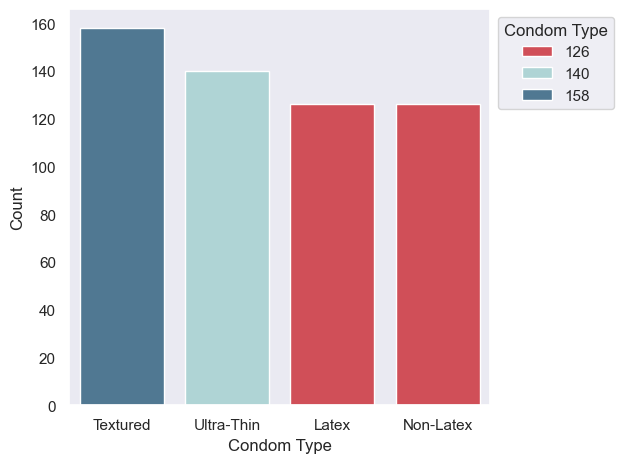

In [25]:
df_condom_type = df['Most Popular Condom Type'].value_counts().reset_index()
custom_palette = ['#E63946','#A8DADC', '#457B9D', '#1D3557','#F1FAEE']
df_condom_type
sns.set_theme(style='dark')
sns.barplot(data=df_condom_type, x='Most Popular Condom Type', y='count', hue='count', palette=custom_palette)
plt.legend(title='Condom Type', loc='upper left', bbox_to_anchor=(1, 1))
plt.xlabel('Condom Type')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [26]:

df_condom_sales_types =  df.pivot_table(values='Market Revenue (Million USD)',index='Year',columns='Most Popular Condom Type',aggfunc='sum')
df_condom_sales_types

Most Popular Condom Type,Latex,Non-Latex,Textured,Ultra-Thin
Year,,,,
2015,12136.152762,45942.648448,16356.518069,37680.721945
2016,29558.373117,12565.635060,46177.527684,23197.240977
2017,23506.113325,31402.897898,21056.627244,45687.007306
2018,23581.436900,16837.941362,61558.235673,18005.213593
2019,26855.121312,23311.555061,27322.229982,36849.928705
2020,39214.281038,23732.232671,35224.440068,26259.573624
2021,33729.507061,18666.493406,53236.908362,26499.495728
2022,30412.899389,26804.360031,44931.313665,29909.868035
2023,36204.661472,29558.686887,31745.576632,41469.662643


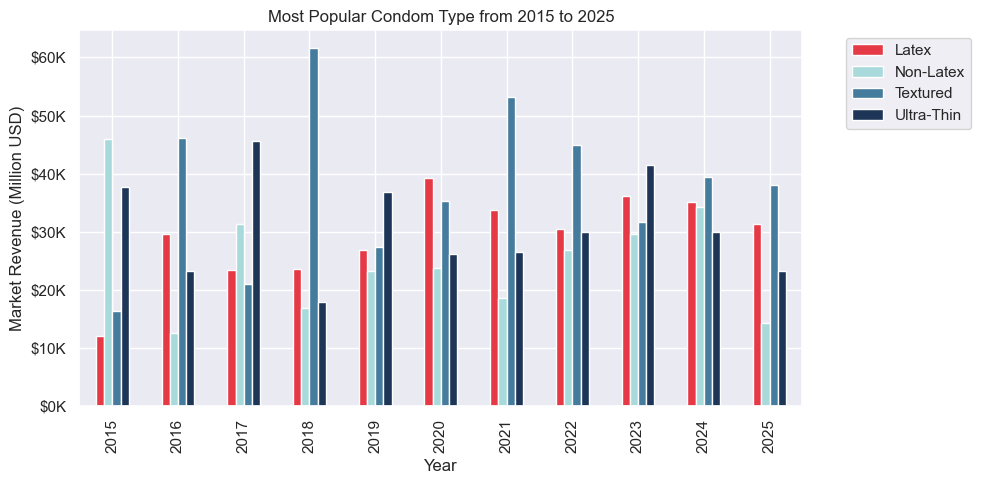

In [48]:
sns.set_theme(style='darkgrid')
ax = df_condom_sales_types.plot(kind='bar', figsize=(10, 5),color=custom_palette)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x,_: f'${int(x/1000)}K'))
plt.title('Most Popular Condom Type from 2015 to 2025')
plt.ylabel('Market Revenue (Million USD)')
plt.tight_layout()
plt.show()

In [63]:
df_hiv_prevention =  df.groupby('Country')['HIV Prevention Awareness (%)'].mean().reset_index()
df_hiv_prevention = df_hiv_prevention.sort_values(by='HIV Prevention Awareness (%)',ascending=True)
df_hiv_prevention 

,Country,HIV Prevention Awareness (%)
4,Germany,58.750000
8,UK,60.078182
1,Brazil,60.694000
5,India,61.443455
6,Japan,61.724727
3,France,61.833455
2,China,62.090364
0,Australia,63.693455
9,USA,64.210909
7,South Africa,65.979818


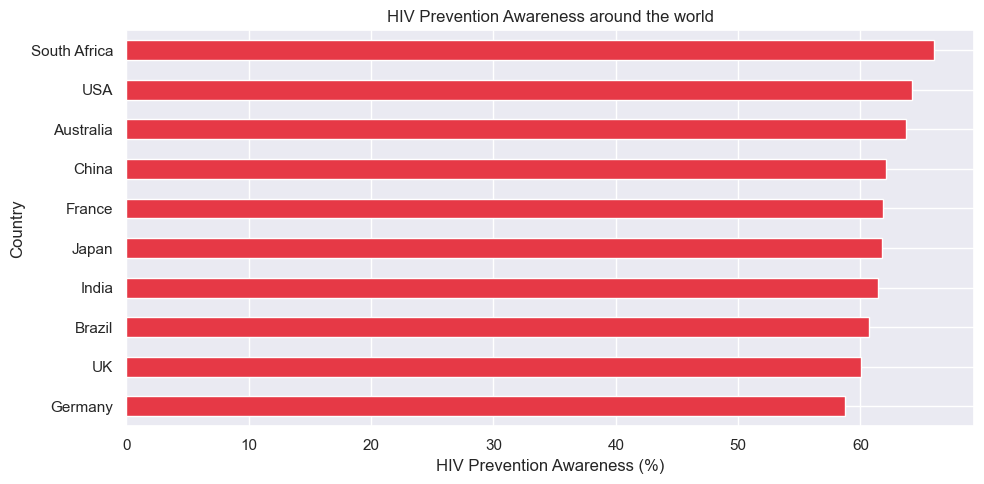

In [85]:
sns.set_theme(style='darkgrid')
df_hiv_prevention.plot(kind='barh',x='Country',y='HIV Prevention Awareness (%)',color='#E63946',figsize=(10, 5))
plt.legend().set_visible(False)
plt.title('HIV Prevention Awareness around the world')
plt.xlabel('HIV Prevention Awareness (%)')
plt.tight_layout()
plt.show()